## 5. Feladatsor

"kriptográfia"

#### 0. Feladat:

Magyarázzuk meg, hogy miért igaz a következő. Melyik alakot érdemes tényleges kódban használni?

```octave
all(arrayfun(@char, 'a' + (0:25)) == "abcdefghijklmnopqrstuvwxyz")
```

In [1]:
0:25

ans =

 Columns 1 through 16:

    0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15

 Columns 17 through 26:

   16   17   18   19   20   21   22   23   24   25



In [2]:
'a'

ans = a


In [3]:
'a' + 0
'b' + 0

ans =  97
ans =  98


In [4]:
char(97)

ans = a


In [5]:
'a' + (0:25)

ans =

 Columns 1 through 13:

    97    98    99   100   101   102   103   104   105   106   107   108   109

 Columns 14 through 26:

   110   111   112   113   114   115   116   117   118   119   120   121   122



In [6]:
arrayfun(@char, 'a' + (0:25))

ans = abcdefghijklmnopqrstuvwxyz


In [7]:
arrayfun(@char, 97:122)

ans = abcdefghijklmnopqrstuvwxyz


In [8]:
arrayfun(@char, 'a' + (0:25)) == "abcdefghijklmnopqrstuvwxyz"

ans =

  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1



In [9]:
all(arrayfun(@char, 'a' + (0:25)) == "abcdefghijklmnopqrstuvwxyz")

ans = 1


#### 1. Feladat:

Shakespeare *The Merchant of Venice* c. <a href='http://shakespeare.mit.edu/merchant/full.html'>műve</a> alapján becsüljük meg, hogy a shakespeare-i angol szövegekben egyes karakterek (a-z) milyen gyakorisággal fordulnak elő. Készítsünk szemléltető ábrát is.

In [10]:
pkg load statistics

OpenJDK 64-Bit Server VM warning: Archived non-system classes are disabled because the java.system.class.loader property is specified (value = "org.octave.OctClassLoader"). To use archived non-system classes, this property must be not be set


In [11]:
merchant_txt = lower(fileread("merchant-full.txt"));

In [12]:
t = tabulate(merchant_txt);

In [13]:
counts = t((end-25):end, 2)
percentages = counts / sum(counts) * 100;

counts =

    6590
    1393
    1809
    3373
   10388
    1950
    1505
    5628
    5842
     196
     653
    3599
    2519
    5588
    7274
    1106
      56
    5010
    5434
    7649
    2838
     888
    2158
     106
    2361
      63



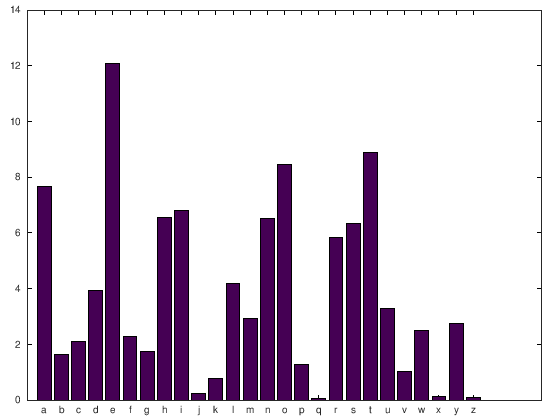

In [16]:
abc = num2cell(arrayfun(@char, 'a' + (0:25)));

bar(percentages)
set(gca, 'XTickLabel',abc,'XTick',1:numel(abc));

#### 2.feladat:

a) Melyek a leggyakoribb betűk? Ábránkat rendezzük gyakoriság szerinti csökkenő sorrendbe.

In [21]:
[_, ixs] = sort(percentages, 'descend');
assert(percentages(ixs), _)

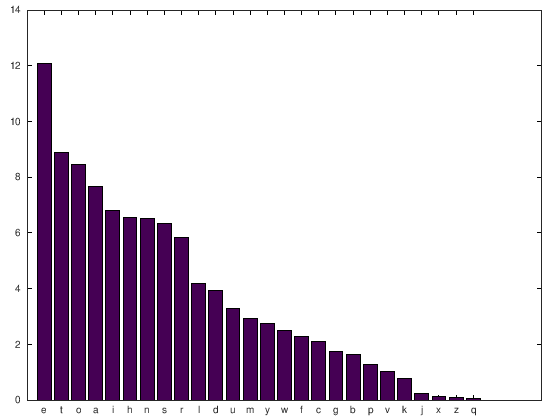

In [27]:
bar(percentages(ixs))
set(gca, 'XTickLabel',abc(ixs),'XTick',1:numel(abc));

b) 
Ez alapján próbáljuk meg kitalálni, hogy mi lehetett eredetileg az alábbi szövegrészlet, mielőtt minden karakterét egy másikra cseréltem egy szabály szerint. (pl. előfordulhatna, hogy `a`-t cseréltem `v`-re, `b`-t `y`-ra, stb.)

*gura yrg zr frr gur engr*

In [32]:
function analyze_percentages(some_text)
    t = tabulate(some_text);
    counts = t((end-25):end, 2);
    percentages = counts / sum(counts) * 100;
    
    abc = num2cell(arrayfun(@char, 'a' + (0:25)));

    [_, ixs] = sort(percentages, 'descend');
    bar(percentages(ixs))
    set(gca, 'XTickLabel',abc(ixs),'XTick',1:numel(abc));
end

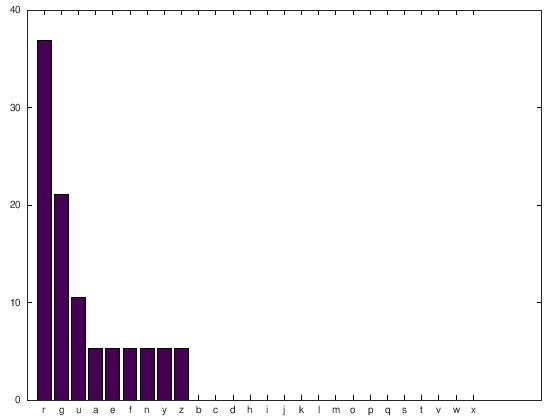

In [33]:
analyze_percentages("gura yrg zr frr gur engr")

In [34]:
helper = repmat("_", 1, numel("gura yrg zr frr gur engr"));
helper("gura yrg zr frr gur engr" == " ") = " "

helper = ____ ___ __ ___ ___ ____


In [35]:
"__e_ _e_ _e _ee __e ___e"
"t_e_ _et _e _ee t_e __te"
"then let me see the rate"

ans = __e_ _e_ _e _ee __e ___e
ans = t_e_ _et _e _ee t_e __te
ans = then let me see the rate


#### 3.feladat:

a) Írjunk függvényt (angol, kisbetűs) szöveg <a href="https://en.wikipedia.org/wiki/ROT13">ROT13</a> kódolására. Felhasználhatjuk, hogy `'z' - 'a' == 25`.

In [65]:
function plaintext = rot13(ciphertext)
    plaintext = ciphertext;
    
    for ix=1:numel(plaintext)
        abc_ix = ciphertext(ix) - 'a';
        if (0 <= abc_ix) && (abc_ix <= 25)
            plaintext(ix) = char('a' + mod(abc_ix + 13, 26));
        end
    end
end

rot13("gura yrg zr frr gur engr")

ans = then let me see the rate


In [66]:
'a' + 0
char('a' + 13)
char('z' + 13)

ans =  97
ans = n
ans = 


In [55]:
'z' - 'a'

ans =  25


In [56]:
'z' - 'a' + 13

ans =  38


In [60]:
'a' + mod('z' - 'a' + 13, 26)

ans =  109


In [61]:
char('a' + mod('z' - 'a' + 13, 26))

ans = m


Milyen tulajdonságot ellenőriz a következő teszt? Hogy lehetne megírni ciklus nélkül?

In [68]:
function test_rot13(num_tests, text_len)
    abc = [arrayfun(@char, 'a' + (0:25)), 
           " ", "-", "+", "/"
           arrayfun(@char, '0' + (0:8))];
    for _=1:num_tests
        random_text = abc(randi(numel(abc), 1, text_len));
        assert(rot13(rot13(random_text)), random_text)
    end
end

test_rot13(100, 20)

b) Írjunk függvényt (angol, kisbetűs) szöveg <a href="https://en.wikipedia.org/wiki/Caesar_cipher">Caesar-kódolására</a>. Az eltolás mértéke legyen bemeneti paraméter. Megoldásunkat ellenőrizzük a fentiekhez hasonlóan.

#### 4.feladat:

Írjunk függvényt (angol, kisbetűs) szöveg <a href="https://en.wikipedia.org/wiki/Substitution_cipher">egyszerű helyettesítés</a> alapú kódolására. Milyen paraméterezés mellett kapjuk vissza az előző feladat a) részének megoldását?

Használhatunk kulcs-érték párok tárolására szolgáló adatstruktúrát, azaz <a href="https://nl.mathworks.com/help/matlab/map-containers.html">Map</a>-et:

In [36]:
char_map = containers.Map(num2cell("abcdefghijklmnopqrstuwvxyz"), 
                          num2cell("nopqrstuvwxyzabcdefghijklm"));

char_map('a')
char_map('b')
char_map('c')

ans = n
ans = o
ans = p


In [37]:
isKey(char_map, 'a')
isKey(char_map, '9')

ans = 1
ans = 0


In [39]:
char_map('a')
char_map('9')

ans = n
error: containers.Map: specified key <9> does not exist
error: called from
    subsref at line 391 column 13
